In [1]:
import random
import matplotlib.pyplot as plt
def monty_hall_game(change_door):
    # randomly select the door with the prize behind it
    prize_door = random.randint(1, 3)
    
    # randomly select the door the player initially picks
    player_door = random.randint(1, 3)
    
    # open one of the doors that doesn't have the prize and isn't the player's door
    if player_door == prize_door:
        opened_door = random.choice([door for door in [1, 2, 3] if door != player_door])
    else:
        opened_door = [door for door in [1, 2, 3] if door != player_door and door != prize_door][0]
    
    # the player either changes or sticks with their original door
    if change_door:
        player_door = [door for door in [1, 2, 3] if door != player_door and door != opened_door][0]
    
    # determine if the player wins or loses
    if player_door == prize_door:
        return "win"
    else:
        return "lose"

def plot(probs_change_door, probs_stick_door, hline=False):  
  plt.figure(dpi=100)
  if hline:
    plt.axhline(1/3, color='red', label='$P=1/3$')
    plt.axhline(2/3, color='green', label='$P=2/3$')
  plt.plot(probs_change_door, label='Change door=True')
  plt.plot(probs_stick_door, label='Change door=False')
  plt.legend()
  plt.xlabel('Number of games')
  plt.ylabel('Probability')
  plt.show()

Change door win percentage:  0.686
Stick door win percentage:  0.33


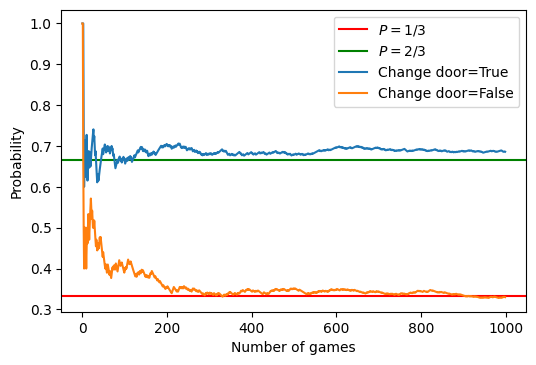

In [3]:
import numpy as np 

num_games = 1000
change_door_wins = 0
stick_door_wins = 0
probs_change_door = np.zeros((num_games,))
probs_stick_door = np.zeros((num_games,))

for i in range(num_games):
    change_door_wins += 1 if monty_hall_game(change_door=True) == "win" else 0
    stick_door_wins += 1 if monty_hall_game(change_door=False) == "win" else 0
    probs_change_door[i] = change_door_wins / (i+1)
    probs_stick_door[i] = stick_door_wins / (i+1)

print("Change door win percentage: ", change_door_wins / num_games)
print("Stick door win percentage: ", stick_door_wins / num_games)

plot(probs_change_door=probs_change_door,
     probs_stick_door=probs_stick_door,
     hline=True)